In [2]:
from sklearn.model_selection import StratifiedKFold
from typing_extensions import final
from Py_FS.wrapper.nature_inspired import GA
from sklearn import datasets
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

# from Py_FS.wrapper.nature_inspired._utilities import Solution, Data, initialize, sort_agents, display, compute_fitness, Conv_plot

# from Py_FS.wrapper.nature_inspired._utilities import Solution, Data, initialize, sort_agents, display, compute_fitness, Conv_plot
# import ga

# data = datasets.load_iris()
# d = GA(20, 100, data.data, data.target)
'''
Py FS.wrapper.nature inspired.GA(num agents, max iter, train data,
train label, obj function=compute fitness, trans function shape=‘s’, prob cross=0.4,
prob mut=0.3, save conv graph=False)
'''
# First: oversampling  Second: feature selection
from collections import Counter
import numpy as np
import smote_variants as sv
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as pl
import random

from sklearn import svm, ensemble
# package
from numpy.core.fromnumeric import mean, size
from openpyxl import load_workbook
from openpyxl.styles import Font
from sklearn import tree

from itertools import permutations
import os
import numpy as np
import pandas as pd
import sys


from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.metrics import roc_auc_score
from sklearn import svm, ensemble
import time
import datetime
import math
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE
from collections import Counter
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as pl
import random

from sklearn import svm, ensemble
from imblearn.over_sampling._smote.base import SMOTE
from imblearn.over_sampling import SMOTE
import smote_variants as sv
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import random
import math
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score

/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# process

In [5]:
def find_maj(sample_class):  # 給 class 資料
    counter = Counter(sample_class)
    maj = list(dict(counter.most_common(1)).keys())

    print('mm', type(maj))
    # maj = "".join(maj)
    maj = " ".join('%s' % id for id in maj)
    # maj = str(maj)
    print(maj)
    return maj


def classprocess(output):
    c = Counter(output)
    datagap = []
    maj = find_maj(output)
    maj = maj.replace('[]', '')
    print('flat', maj)
    print('dd', dict(c)[0])
    # maj_num = dict(c)[find_maj(output)]
    maj = int(maj)
    maj_num = dict(c)[maj]
    for className, number in c.items():
        #print(className," ",number)
     #   print(number)
        temp = np.array([className, (maj_num - number)])
        datagap.append(temp)
    return datagap


def preprocess(data):
    '''
    finaldata represent the X in the data (input atrribute)
    output repesent the y in the data (output attribute)
    '''
    le = preprocessing.LabelEncoder()
    lastColumn = data.columns[-1]
    # data[lastColumn] = data[lastColumn].str.replace(
    #     "\n", "").str.strip()
    l = data.shape[1]-1
    output = data.iloc[:, l]
    classCount = classprocess(output)
    finaldata = data.iloc[:, :l]
    finaldata.iloc[:, 0] = le.fit_transform(
        finaldata.iloc[:, 0])
    output = le.fit_transform(output)

    return classCount, finaldata, output

# Synth

In [6]:
def synth(finaldata, output, method):
    finaldata = np.array(finaldata)
    output = np.array(output)
    if method is 'poly':  # "poly" in method:
        print("pol")
        over = sv.polynom_fit_SMOTE()
    elif method is 'prow':  # "proW" in method:
        print("pro")
        over = sv.ProWSyn()
    elif method is 'SMOTEIPF':  # "SMOTEIPF" in method:
        print("smoteipf")
        over = sv.SMOTE_IPF()
    elif method is 'smote':
        print("smote")
        over = SMOTE(k_neighbors=2)
        X_synth, y_syth = over.fit_resample(finaldata, output)
        return X_synth, y_syth
    elif method is 'baseline':
        return finaldata, output

    X_synth, y_syth = over.sample(finaldata, output)
    return X_synth, y_syth

In [137]:
c =Counter(dfuse.iloc[:,-1])
c.most_common()

[(0, 87), (1, 13)]

# Elbow

In [10]:
def ElbowCenterGenerate(train, ratio, method, path):
    # 經過 select column 完的
    # train 直接就是資料
    alloverpolynom = []
    overpolynom = []
    centerpolynom = []
    centerpolynomvalue = []
    countfor = 0

    le = preprocessing.LabelEncoder()
    classCount, finaldata, output = preprocess(train)
    minclass = Counter(output).most_common()[1][0]
    print('minclass',minclass)
    print('traincc',Counter(train.iloc[:,-1]))
    X_polynom, y_polynom = synth(
        finaldata, output, method)
    X_polynom = pd.DataFrame(X_polynom,columns=finaldata.columns)
    y_polynom = pd.DataFrame(y_polynom,columns = [train.columns[-1]])
    alloverpolynom = pd.concat(
        [X_polynom, y_polynom], axis=1)  # SMOTE 完後的數據
    # overpolynom.append(alloverpolynom)
    print('cc',Counter(alloverpolynom.iloc[:,-1]))
    print('allover',alloverpolynom.shape)
    overpolynom = alloverpolynom
    tempcenterpolynom = []
    originlen = train.shape[0]
    for i in range(len(classCount)):  # 不同類個別要產生多少數據才能平衡 目前是二分類
        origincount = int(classCount[i][1])
        print("要產生的資料數", origincount)
        countfor = math.floor(
            int(classCount[i][1])*ratio)  # 要產生多少數據  無條件捨去
    #randomIndex.extend([random.randint(len(data),len(X_smote)-1) for _ in range(count)])

        if(countfor > 0):
            print(len(train.columns))
            
            dtemp = pd.DataFrame(overpolynom)
            print('dsd',dtemp.shape)
            ln = dtemp.columns[-1]
            Xtest = dtemp[dtemp[ln]==minclass]
            print('minccc',Counter(Xtest.iloc[:,-1]))
            # X = dtemp[dtemp[ln]==minclass].iloc[:,:dtemp.shape[1]-1] # 選取小類的資料
            
            X = dtemp.iloc[originlen:, :dtemp.shape[1]-1]  # 後來生成的 都是小類
            X.reset_index(inplace=True, drop=True)
        # print("要產生多少",countfor)
        # 計算應該分成幾群
            model = KMeans()
            visualizer = KElbowVisualizer(model, k=(1, 12))

            # Fit the data to the visualizer
            kmodel = visualizer.fit(X)
            cluster_count = kmodel.elbow_value_  # 最佳要分成幾群
            kmeans = KMeans(n_clusters=cluster_count)
            kmeans.fit(X)
            label = Counter(kmeans.labels_)  # 標籤分類狀況

            # 不同群的比例
            labelRatio = []
            for key, element in sorted(label.items()):
                labelRatio.append(element/origincount)
            
            # print(X.columns[-1])
        # 把分類標籤跟原始資料進行合併
            klabel = pd.DataFrame(
                {'label': kmeans.labels_})  # 建立一個欄位名為 label 的
            df = pd.concat([X, klabel], axis=1)  # X 是後來生成的數據 類別都是小類
            
            print(df.columns)
            centers = kmeans.cluster_centers_  # 各群群中心
            # print(centers[0],'\nthe other',centers[1])
            distance = []
            X = X.astype('float64')
            centers = centers.astype('float64')
            tempindata = {}
            distancesortemp = []

        # 計算每個點跟各群中心的距離
            
            ct = 0
        # print("分成",cluster_count,"群")
        # print("要產生",countfor)
            tempcenterpolynom = []  # 清空
            for ic in range(cluster_count): # 總共分成幾群 每一群有其群中心 
                ct += 1
                tempindata = {} # 清空

                temppolynom = []
            # 把不同群過濾出來
                # df 是 X 跟 label 結合後的 dataframe
                # tempdf 是指那一群的資料
                tempdf = df[df['label'] == ic]
                
                print(ic,'類共有幾個data',tempdf.shape[0],'len',len(tempdf))
            # allCluster.append(df[df['label']==ic])

            # 計算每個點跟群中心的距離
                for i in range(tempdf.shape[0]):  # 列 也就是幾筆資料
                    
                    distance = []
                    temp = 0  # 放算出來的距離
                    tempsum = 0
                    # 到前一欄 因為最後一欄為 label
                    for j in range(tempdf.shape[1]-2):
                        # 該欄位跟center欄位的距離
                        temp = pow((centers[ic][j]-tempdf.iloc[i][j]), 2)
                        tempsum = tempsum + temp
                    #print(tempsum)
                        tempindata[i] = tempsum
                # print('第',ic,'類',len(tempindata))
                # print('第',ic,'類',tempindata)
                # 排序跟center計算出來的距離 tempindata 是一個dict key 存的是原始的index, value存的是距離
                distancesortemp = sorted(
                    tempindata.items(), key=lambda item: item[1])
                # print('第',ic,'類',distancesortemp)
            # 要按照比例挑出資料

                countforlabel = math.ceil(
                    countfor * labelRatio[ic])  # 按照比例 給不同的數量 不同群不同數量
            # print("比例",labelRatio)
                temppolynom.extend(
                    distancesortemp[:countforlabel])  # 該群所要的數量
            # print("該群所要的數量",len(temppolynom))
        # tempcenterpolynom.extend(temppolynom) # 該份資料集所要的所有資料
            # print("ct",ct)
                # print('weig',temppolynom)
                tempcenterpolynom = tempcenterpolynom+temppolynom
            # print('weig22',tempcenterpolynom)
            centerpolynom.append(tempcenterpolynom)  # 所有群所要的資料集 # 所有資料集所選到的資料
            # print('centerpoly',centerpolynom)
        # print("真的有幾筆",len(centerpolynom[ii]))
    #print(centerpolynom[0])
    # print('alldatalist',list(overpolynom[0].iloc[12]))
    # print('alldata',overpolynom)
    # for i in range(len(centerpolynom)):
    #     print(i)
    alltemp = []
    for j in range(len(centerpolynom[0])):
            indexpolynom = centerpolynom[0][j][0] + originlen 
            
            alltemp.append(list(overpolynom.iloc[indexpolynom]))
        # print('index choose',alltemp)
        # 進行 feature selection filter chi-square
    centerpolynomvalue.append(alltemp)
    print(np.shape(centerpolynomvalue))
    # 輸出的是
    return centerpolynomvalue

In [132]:
dd = pd.DataFrame(randompoly[0],columns=dfuse.columns)
ln = dd.columns[-1]
ddn = dd[dd[ln]==1]
dd

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,13.890110,0.515106,0.496239,0.606892,0.606892,0.998929,0.797297,0.809222,0.303446,0.781427,...,0.008793,0.623374,0.606893,0.842254,0.283053,0.201641,0.569027,1.0,0.020045,1.0
1,4.263736,0.438510,0.422577,0.600205,0.600205,0.998934,0.796973,0.808902,0.302870,0.781090,...,0.009539,0.622793,0.600202,0.836494,0.286288,0.034186,0.564953,1.0,0.017198,1.0
2,3.175824,0.433803,0.416968,0.600622,0.600622,0.998946,0.796945,0.808871,0.302796,0.781055,...,0.009433,0.622822,0.600619,0.833626,0.287593,0.031658,0.564652,1.0,0.016955,1.0
3,14.945055,0.526660,0.506485,0.608564,0.608564,0.998938,0.797338,0.809261,0.303501,0.781466,...,0.008558,0.623513,0.608565,0.841111,0.283449,0.233109,0.569601,1.0,0.020420,1.0
4,12.835165,0.503552,0.485994,0.605221,0.605221,0.998921,0.797255,0.809183,0.303390,0.781387,...,0.009027,0.623235,0.605221,0.843396,0.282656,0.170173,0.568453,1.0,0.019670,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.175824,0.433803,0.416968,0.600622,0.600622,0.998946,0.796945,0.808871,0.302796,0.781055,...,0.009433,0.622822,0.600619,0.833626,0.287593,0.031658,0.564652,1.0,0.016955,1.0
59,12.835165,0.503552,0.485994,0.605221,0.605221,0.998921,0.797255,0.809183,0.303390,0.781387,...,0.009027,0.623235,0.605221,0.843396,0.282656,0.170173,0.568453,1.0,0.019670,1.0
60,5.351648,0.443216,0.428185,0.599787,0.599787,0.998922,0.797002,0.808933,0.302945,0.781124,...,0.009646,0.622765,0.599785,0.839361,0.284983,0.036715,0.565254,1.0,0.017441,1.0
61,2.087912,0.429096,0.411359,0.601040,0.601040,0.998958,0.796916,0.808840,0.302721,0.781020,...,0.009326,0.622850,0.601036,0.830758,0.288897,0.029129,0.564351,1.0,0.016712,1.0


In [207]:
te = pd.DataFrame(randompoly[0],columns=dfuse.columns)
Counter(te.iloc[:,-1])

Counter({1.0: 74})

2022-01-14 20:00:58,179:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


mm <class 'list'>
0
flat 0
dd 87
minclass 1
traincc Counter({0: 87, 1: 13})
pol
cc Counter({1: 91, 0: 87})
allover (178, 96)
要產生的資料數 74
96
dsd (178, 96)
minccc Counter({1: 91})
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Op

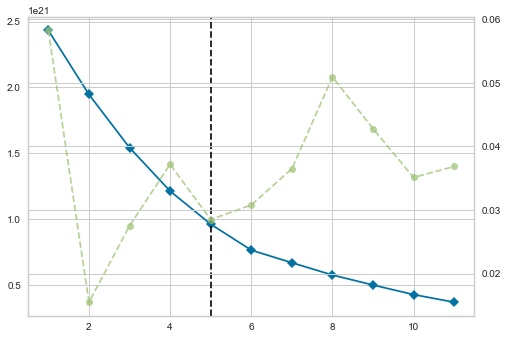

In [206]:
randompoly = ElbowCenterGenerate(dfuse, 0.8, "poly", '')

# origin elbow

In [ ]:
def ElbowCenterGenerate(train, ratio, method, path):
    # 經過 select column 完的
    # train 直接就是資料
    alloverpolynom = []
    overpolynom = []
    centerpolynom = []
    centerpolynomvalue = []
    countfor = 0

    le = preprocessing.LabelEncoder()
    classCount, finaldata, output = preprocess(train)

    X_polynom, y_polynom = synth(
        finaldata, output, method)
    X_polynom = pd.DataFrame(X_polynom)
    y_polynom = pd.DataFrame(y_polynom)
    alloverpolynom = pd.concat(
        [X_polynom, y_polynom], axis=1)  # SMOTE 完後的數據
    # overpolynom.append(alloverpolynom)
    overpolynom = alloverpolynom
    tempcenterpolynom = []
    originlen = train.shape[0]
    for i in range(len(classCount)):  # 不同類個別要產生多少數據才能平衡 目前是二分類
        origincount = int(classCount[i][1])
        print("要產生的資料數", origincount)
        countfor = math.floor(
            int(classCount[i][1])*ratio)  # 要產生多少數據  無條件捨去
    #randomIndex.extend([random.randint(len(data),len(X_smote)-1) for _ in range(count)])

        if(countfor > 0):
            dtemp = pd.DataFrame(overpolynom)
            X = dtemp.iloc[originlen:, :dtemp.shape[1]-1]  # 後來生成的 都是小類
            X.reset_index(inplace=True, drop=True)
        # print("要產生多少",countfor)
        # 計算應該分成幾群
            model = KMeans()
            visualizer = KElbowVisualizer(model, k=(1, 12))

            # Fit the data to the visualizer
            kmodel = visualizer.fit(X)
            cluster_count = kmodel.elbow_value_  # 最佳要分成幾群
            kmeans = KMeans(n_clusters=cluster_count)
            kmeans.fit(X)
            label = Counter(kmeans.labels_)  # 標籤分類狀況

            # 不同群的比例
            labelRatio = []
            for key, element in sorted(label.items()):
                labelRatio.append(element/origincount)
        # print(labelRatio)

        # 把分類標籤跟原始資料進行合併
            klabel = pd.DataFrame(
                {'label': kmeans.labels_})  # 建立一個欄位名為 label 的
            df = pd.concat([X, klabel], axis=1)  # X 是後來生成的數據 類別都是小類
        # print(df)
            centers = kmeans.cluster_centers_  # 各群群中心

            distance = []
            X = X.astype('float64')
            centers = centers.astype('float64')
            tempindata = {}
            distancesortemp = []

        # 計算每個點跟各群中心的距離

            ct = 0
        # print("分成",cluster_count,"群")
        # print("要產生",countfor)
            tempcenterpolynom = []  # 清空
            for ic in range(cluster_count):
                ct += 1

                temppolynom = []
            # 把不同群過濾出來
                # df 是 X 跟 label 結合後的 dataframe
                tempdf = df[df['label'] == ic]
            # allCluster.append(df[df['label']==ic])

            # 計算每個點跟群中心的距離
                for i in range(tempdf.shape[0]-1):  # 列 也就是幾筆資料

                    distance = []
                    temp = 0  # 放算出來的距離
                    tempsum = 0
                    # 到前一欄 因為最後一欄為 label
                    for j in range(tempdf.shape[1]-2):
                        # 該欄位跟center欄位的距離
                        temp = pow((centers[ic][j]-tempdf.iloc[i][j]), 2)
                        tempsum = tempsum + temp
                    # print(tempsum)
                        tempindata[i] = tempsum

                distancesortemp = sorted(
                    tempindata.items(), key=lambda item: item[1])
            # print(distancesortemp)

            # 要按照比例挑出資料

                countforlabel = math.ceil(
                    countfor * labelRatio[ic])  # 按照比例 給不同的數量 不同群不同數量
            # print("比例",labelRatio)
                temppolynom.extend(
                    distancesortemp[:countforlabel])  # 該群所要的數量
            # print("該群所要的數量",len(temppolynom))
        # tempcenterpolynom.extend(temppolynom) # 該份資料集所要的所有資料

            # print("ct",ct)
                tempcenterpolynom = tempcenterpolynom+temppolynom

            centerpolynom.append(tempcenterpolynom)  # 所有資料集所選到的資料
        # print("真的有幾筆",len(centerpolynom[ii]))
    #print(centerpolynom[0])
    for i in range(len(centerpolynom)):
        alltemp = []
        for j in range(len(centerpolynom[i])):
            indexpolynom = centerpolynom[i][j][0] + originlen - 1
            alltemp.append(list(overpolynom[i].iloc[indexpolynom]))
        # 進行 feature selection filter chi-square
        centerpolynomvalue.append(alltemp)
    print(np.shape(centerpolynomvalue))
    return centerpolynomvalue

# Read data

In [13]:
df = pd.read_csv('/Users/emily/Desktop/Research/oversampling_python/data/scene.csv') # /Users/emily/Desktop/emotions.csv
df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [25]:
df = pd.read_csv('/Users/emily/Desktop/emotions.csv') # 
df.columns

Index(['Mean_Acc1298_Mean_Mem40_Centroid', 'Mean_Acc1298_Mean_Mem40_Rolloff',
       'Mean_Acc1298_Mean_Mem40_Flux', 'Mean_Acc1298_Mean_Mem40_MFCC_0',
       'Mean_Acc1298_Mean_Mem40_MFCC_1', 'Mean_Acc1298_Mean_Mem40_MFCC_2',
       'Mean_Acc1298_Mean_Mem40_MFCC_3', 'Mean_Acc1298_Mean_Mem40_MFCC_4',
       'Mean_Acc1298_Mean_Mem40_MFCC_5', 'Mean_Acc1298_Mean_Mem40_MFCC_6',
       'Mean_Acc1298_Mean_Mem40_MFCC_7', 'Mean_Acc1298_Mean_Mem40_MFCC_8',
       'Mean_Acc1298_Mean_Mem40_MFCC_9', 'Mean_Acc1298_Mean_Mem40_MFCC_10',
       'Mean_Acc1298_Mean_Mem40_MFCC_11', 'Mean_Acc1298_Mean_Mem40_MFCC_12',
       'Mean_Acc1298_Std_Mem40_Centroid', 'Mean_Acc1298_Std_Mem40_Rolloff',
       'Mean_Acc1298_Std_Mem40_Flux', 'Mean_Acc1298_Std_Mem40_MFCC_0',
       'Mean_Acc1298_Std_Mem40_MFCC_1', 'Mean_Acc1298_Std_Mem40_MFCC_2',
       'Mean_Acc1298_Std_Mem40_MFCC_3', 'Mean_Acc1298_Std_Mem40_MFCC_4',
       'Mean_Acc1298_Std_Mem40_MFCC_5', 'Mean_Acc1298_Std_Mem40_MFCC_6',
       'Mean_Acc1298_Std_Mem40

In [28]:
dfNDD = pd.read_excel('/Users/emily/Desktop/Research/oversampling_python/data/NSL-KDD/Kddcup99.xlsx',index_col=0)
dfNDD

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
494016,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
494017,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
494018,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
import pandas as pd
dfsc = pd.read_excel('/Users/emily/Desktop/Research/oversampling_python/data/imb_IRhigherThan9p1/ecoli4/ecoli4-5-1tra.xlsx',index_col=0)
dfsc

/Users/emily/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Class
1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,negative\n
2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,negative\n
3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,negative\n
4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,negative\n
5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,negative\n
...,...,...,...,...,...,...,...,...
264,0.43,0.59,0.48,0.5,0.52,0.49,0.56,negative\n
265,0.74,0.56,0.48,0.5,0.47,0.68,0.30,negative\n
266,0.71,0.57,0.48,0.5,0.48,0.35,0.32,negative\n
267,0.61,0.60,0.48,0.5,0.44,0.39,0.38,negative\n


In [188]:
dfnom = pd.read_csv('../data/scene.csv')
dfnom

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [2]:
import pandas as pd
dfmulti =  pd.read_excel('/Users/emily/Desktop/arrhythmia.xlsx',index_col=0)


/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [8]:
df

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed.suprised,happy.pleased,relaxing.calm,quiet.still,sad.lonely,angry.aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,False,True,True,False,False,False
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,True,False,False,False,False,True
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,False,True,False,False,False,True
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,False,False,True,False,False,False
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2,0.261742,0.002657,1.149211,False,False,True,True,True,False
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2,0.282122,0.052218,0.335371,True,False,False,False,True,True
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2,0.184313,0.247136,0.476993,False,False,True,True,True,False
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2,0.547126,0.183494,1.255820,False,True,True,False,False,False


# 5 fold

In [32]:
from sklearn.metrics import roc_auc_score
def foldval(df):

    X = np.array(df.iloc[:, :-1])
    y = np.array(df.iloc[:, -1])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # enumerate the splits and summarize the distributions
    # print(X)
    # print(y)
    accuracyDe = []
    for train_ix, test_ix in kfold.split(X, y):
        # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # summarize train and test composition 兩個不同類別的比例
        train_0, train_1 = len(train_y[train_y == 0]), len(
            train_y[train_y == 1])
        test_0, test_1 = len(test_y[test_y == 0]), len(test_y[test_y == 1])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' %
              (train_0, train_1, test_0, test_1))
        # clf = DecisionTreeClassifier().fit(train_X, train_y)
        clf = svm.SVC(kernel='rbf', C=1).fit(train_X, train_y)
        
        #svm.SVC(kernel='linear', C=1, gamma='auto')
        test_y_predicted = clf.predict(test_X)
        
        accuracyDe.append(roc_auc_score(test_y, test_y_predicted))
        #accuracyDe.append(roc_auc_score(test_y, test_y_predicted,multi_class="ovr"))
    print(accuracyDe)
    meanDe = statistics.mean(accuracyDe)
    return meanDe

In [33]:
import numpy as np
foldval(df)

>Train: 0=323, 1=151, Test: 0=81, 1=38
>Train: 0=323, 1=151, Test: 0=81, 1=38
>Train: 0=323, 1=151, Test: 0=81, 1=38
>Train: 0=323, 1=152, Test: 0=81, 1=37
>Train: 0=324, 1=151, Test: 0=80, 1=38
[0.5, 0.5, 0.5, 0.5, 0.5]


0.5

# GA

In [21]:
def GAselect(df):
    labelencoder = LabelEncoder()
    # df 會是資料 dataframe 模式的
    array = df.values
    X = array[:, :-1]
    Y = array[:, -1]
    Y = labelencoder.fit_transform(Y)
    X = MinMaxScaler().fit(X).transform(X)
    # Y = array[:,128]
    columnselect = GA(df, 20, 100, X, Y)
    lastcol = df.columns[-1]
    columnselect = columnselect.append(lastcol)
    dfafterselect = pd.DataFrame(df, columns=columnselect)
    return dfafterselect

In [22]:
GAselect(df)
# df.columns

1234
acc= 0.8571428571428571
accuracy score= 0.8571428571428571
roc= 0.8321962313190383
acc= 0.8067226890756303
accuracy score= 0.8067226890756303
roc= 0.8021442495126706
acc= 0.907563025210084
accuracy score= 0.907563025210084
roc= 0.8832033788174138
acc= 0.7983193277310925
accuracy score= 0.7983193277310925
roc= 0.7820012995451592
acc= 0.8319327731092437
accuracy score= 0.8319327731092437
roc= 0.8206627680311891
acc= 0.907563025210084
accuracy score= 0.907563025210084
roc= 0.9041585445094218
acc= 0.7983193277310925
accuracy score= 0.7983193277310925
roc= 0.7680311890838206
acc= 0.7899159663865546
accuracy score= 0.7899159663865546
roc= 0.7478882391163093
acc= 0.8235294117647058
accuracy score= 0.8235294117647058
roc= 0.8144899285250162
acc= 0.8823529411764706
accuracy score= 0.8823529411764706
roc= 0.8646848602988956
acc= 0.8151260504201681
accuracy score= 0.8151260504201681
roc= 0.7803768680961662
acc= 0.8571428571428571
accuracy score= 0.8571428571428571
roc= 0.8252111760883691
acc

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed.suprised,happy.pleased,relaxing.calm,quiet.still,sad.lonely,angry.aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,False,True,True,False,False,False
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,True,False,False,False,False,True
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,False,True,False,False,False,True
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,False,False,True,False,False,False
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2,0.261742,0.002657,1.149211,False,False,True,True,True,False
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2,0.282122,0.052218,0.335371,True,False,False,False,True,True
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2,0.184313,0.247136,0.476993,False,False,True,True,True,False
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2,0.547126,0.183494,1.255820,False,True,True,False,False,False


In [15]:
df.columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8',
       'attr9', 'attr10',
       ...
       'attr291', 'attr292', 'attr293', 'attr294', 'Beach', 'Sunset',
       'FallFoliage', 'Field', 'Mountain', 'Urban'],
      dtype='object', length=300)

# implement

In [5]:
df = pd.read_csv('/Users/emily/Desktop/Research/oversampling_python/data/scene.csv')
df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [7]:
meanDe = foldval(df)
meanDe

>Train: 0=1580, 1=345, Test: 0=396, 1=86
>Train: 0=1581, 1=344, Test: 0=395, 1=87
>Train: 0=1581, 1=345, Test: 0=395, 1=86
>Train: 0=1581, 1=345, Test: 0=395, 1=86
>Train: 0=1581, 1=345, Test: 0=395, 1=86
[0.8202959830866807, 0.8768805470682379, 0.8270385634383279, 0.9119958787165146, 0.8409626140712392]


0.8554347172762

In [38]:
meanDe = foldval(dfNDD)

>Train: 0=317395, 1=77821, Test: 0=79348, 1=19456
>Train: 0=317395, 1=77821, Test: 0=79348, 1=19456
>Train: 0=317394, 1=77822, Test: 0=79349, 1=19455
>Train: 0=317394, 1=77822, Test: 0=79349, 1=19455
>Train: 0=317394, 1=77822, Test: 0=79349, 1=19455
[1.0, 1.0, 1.0, 1.0, 1.0]


In [179]:
dfnom = pd.read_csv('/Users/emily/Desktop/OVA_Omentum.csv')

In [190]:
meanSVM = foldval(dfnom)

[[0.646467 0.666435 0.685047 ... 0.       0.       1.      ]
 [0.770156 0.767255 0.761053 ... 0.       0.       0.      ]
 [0.793984 0.772096 0.76182  ... 0.       0.       0.      ]
 ...
 [0.952281 0.944987 0.905556 ... 0.       0.       0.      ]
 [0.88399  0.899004 0.901019 ... 0.       0.       0.      ]
 [0.974915 0.866425 0.818144 ... 0.       0.       0.      ]]
[0 1 0 ... 1 1 1]
>Train: 0=1580, 1=345, Test: 0=396, 1=86
>Train: 0=1581, 1=344, Test: 0=395, 1=87
>Train: 0=1581, 1=345, Test: 0=395, 1=86
>Train: 0=1581, 1=345, Test: 0=395, 1=86
>Train: 0=1581, 1=345, Test: 0=395, 1=86
[0.7254815597838854, 0.632183908045977, 0.6744186046511628, 0.6511627906976745, 0.6395348837209303]


In [191]:
meanSVM

0.664556349379926

In [166]:
# 處理 ps4 data(software fraud detection)
ln = dfnom.columns[-1]
dfnom[ln] = dfnom[ln].replace(False,0)
dfnom[ln] = dfnom[ln].replace(True,1)

In [184]:
# OVA_Omentum 
ln = dfnom.columns[-1]
dfnom[ln] = dfnom[ln].replace('Other',0)
dfnom[ln] = dfnom[ln].replace('Omentum',1)

In [185]:
Counter(dfnom.iloc[:,-1])

Counter({0: 1468, 1: 77})

In [198]:
dfnom.to_csv('../data/internet.csv')

In [201]:
dfnom = pd.read_csv('/Users/emily/Desktop/internet.csv')
dfnom

,height,width,aratio,local,url.images.buttons,url.likesbooks.com,url.www.slake.com,url.hydrogeologist,url.oso,url.media,...,caption.home,caption.my,caption.your,caption.in,caption.bytes,caption.here,caption.click,caption.for,caption.you,class
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,noad
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,noad
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,noad
3277,0,0,0.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,noad


In [207]:
dfnom = pd.read_csv('/Users/emily/Desktop/speech.csv')
Counter(dfnom.iloc[:,-1])

Counter({"'Anomaly'": 61, "'Normal'": 3625})

In [213]:
dfnom = pd.read_csv('/Users/emily/Desktop/speech.csv')
Counter(dfnom.iloc[:,-1])
ln = dfnom.columns[-1]
dfnom[ln] = dfnom[ln].replace("'Anomaly'",0)
dfnom[ln] = dfnom[ln].replace("'Normal'",1)
Counter(dfnom.iloc[:,-1])
meanDe = foldval(dfnom)
meanDe

[[-0.35069   0.52721  -1.6247   ...  0.50382  -0.45571   0.86283 ]
 [-0.42537  -0.08818   0.84575  ... -0.024029  0.28696  -0.12374 ]
 [-1.221     0.4396   -0.06303  ...  0.097137 -0.55111   0.69951 ]
 ...
 [ 0.94843   0.35538  -1.0401   ...  0.18958   1.0461   -0.30757 ]
 [ 1.498    -0.66785   1.048    ...  0.36967  -0.49249  -0.40257 ]
 [-0.85682  -1.4562   -0.19547  ...  0.48754  -0.1466   -0.76304 ]]
[0 0 0 ... 1 1 1]
>Train: 0=48, 1=2900, Test: 0=13, 1=725
>Train: 0=49, 1=2900, Test: 0=12, 1=725
>Train: 0=49, 1=2900, Test: 0=12, 1=725
>Train: 0=49, 1=2900, Test: 0=12, 1=725
>Train: 0=49, 1=2900, Test: 0=12, 1=725
[0.526737400530504, 0.4862068965517241, 0.5654022988505747, 0.5313218390804598, 0.4882758620689655]


0.5195888594164456

In [214]:
dfnom.to_csv('../data/speech.csv')

In [202]:
dfnom.shape

(3279, 1559)

In [182]:
Counter(dfnom.iloc[:,-1])

Counter({'Other': 1468, 'Omentum': 77})

In [186]:
meanDe = foldval(dfnom)
meanDe

[[1.79922e+05 5.31950e+03 6.69400e+02 ... 2.29930e+03 8.98300e+02
  1.31170e+03]
 [1.17729e+05 3.19310e+03 4.61980e+03 ... 2.05980e+03 9.25400e+02
  1.16270e+03]
 [5.31030e+04 2.61550e+03 3.87760e+03 ... 1.46960e+03 5.03300e+02
  1.01470e+03]
 ...
 [1.02491e+05 6.85600e+03 2.79120e+03 ... 4.51360e+03 1.82270e+03
  2.88550e+03]
 [7.65020e+04 4.94850e+03 4.39050e+03 ... 1.23480e+03 1.69800e+02
  6.47600e+02]
 [1.52574e+05 2.20550e+03 5.46230e+03 ... 7.81480e+03 2.98150e+03
  4.39160e+03]]
[0 0 0 ... 1 1 1]
>Train: 0=1174, 1=62, Test: 0=294, 1=15
>Train: 0=1174, 1=62, Test: 0=294, 1=15
>Train: 0=1174, 1=62, Test: 0=294, 1=15
>Train: 0=1175, 1=61, Test: 0=293, 1=16
>Train: 0=1175, 1=61, Test: 0=293, 1=16
[0.6547619047619047, 0.6547619047619047, 0.6547619047619047, 0.6704351535836177, 0.6965656996587032]


0.6662573135056069

In [105]:
dff = pd.read_csv('/Users/emily/Desktop/Research/oversampling_python/data/phpuZu33P.csv')
dff

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [68]:
dff

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [106]:
meanDe = foldval(dff)
meanDe

>Train: 0=1580, 1=345, Test: 0=396, 1=86
>Train: 0=1581, 1=344, Test: 0=395, 1=87
>Train: 0=1581, 1=345, Test: 0=395, 1=86
>Train: 0=1581, 1=345, Test: 0=395, 1=86
>Train: 0=1581, 1=345, Test: 0=395, 1=86
[0.8306612638007986, 0.8768805470682379, 0.8442449219899912, 0.9074477480129526, 0.8422284368560494]


0.8602925835456059

In [56]:
dffs

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [ ]:
for i in range(dffs.shape[1]):
    print(i)
    for j in range(dffs.shape[0]-2):
        print(j)
        if isinstance(dffs.iloc[i,j],str):
            print('133')
    

In [ ]:
dffs = pd.read_csv('/Users/emily/Desktop/musk.csv')
meanDe = foldval(dffs)

2022-01-15 15:40:30,583:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


mm <class 'list'>
0
flat 0
dd 87
minclass 1
traincc Counter({0: 87, 1: 13})
pol
cc Counter({1: 91, 0: 87})
allover (178, 96)
要產生的資料數 74
96
dsd (178, 96)
minccc Counter({1: 91})
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Op

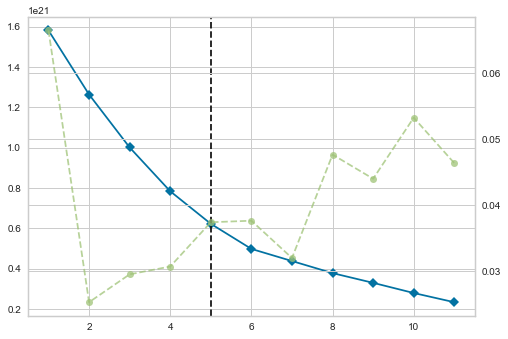

In [13]:
randompoly = ElbowCenterGenerate(dfuse, 0.8, "poly", '')
print(randompoly[0][1])
allRandom = pd.DataFrame(randompoly[0],columns=dfuse.columns)
mergedata = pd.concat([allRandom,dfuse],axis=0)
print(mergedata)
meanDe = foldval(mergedata)
print(meanDe)

# other

In [ ]:
dd = pd.DataFrame(randompoly[0],columns=dfuse.columns)
from collections import Counter
c = Counter(dd.iloc[:,-1])
c

In [29]:
meanDe = foldval(dfNDD)
print(meanDe)

>Train: 0=317395, 1=77821, Test: 0=79348, 1=19456
>Train: 0=317395, 1=77821, Test: 0=79348, 1=19456
>Train: 0=317394, 1=77822, Test: 0=79349, 1=19455
>Train: 0=317394, 1=77822, Test: 0=79349, 1=19455
>Train: 0=317394, 1=77822, Test: 0=79349, 1=19455
[1.0, 1.0, 1.0, 1.0, 1.0]
1.0


# 加入 SMOTE 方法

In [17]:

df = pd.read_excel('/Users/emily/Desktop/Research/oversampling_python/data/bank/bankrupt.xlsx')
df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890,0
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284,0
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649,0
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009,0


In [27]:
dfinter = pd.read_csv('/Users/emily/Desktop/Research/oversampling_python/data/internet.csv')
dfinter

,Unnamed: 0,height,width,aratio,local,url.images.buttons,url.likesbooks.com,url.www.slake.com,url.hydrogeologist,url.oso,...,caption.home,caption.my,caption.your,caption.in,caption.bytes,caption.here,caption.click,caption.for,caption.you,class
0,0,125,125,1.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,60,468,7.8000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,60,468,7.8000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,3274,170,94,0.5529,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3275,3275,101,140,1.3861,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3276,3276,23,120,5.2173,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3277,3277,0,0,0.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
dfscene = pd.read_csv('/Users/emily/Desktop/Research/oversampling_python/data/scene.csv')

In [35]:
df = pd.read_csv('/Users/emily/Desktop/emotions.csv')
df

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed.suprised,happy.pleased,relaxing.calm,quiet.still,sad.lonely,angry.aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,False,True,True,False,False,False
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,True,False,False,False,False,True
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,False,True,False,False,False,True
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,False,False,True,False,False,False
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2,0.261742,0.002657,1.149211,False,False,True,True,True,False
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2,0.282122,0.052218,0.335371,True,False,False,False,True,True
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2,0.184313,0.247136,0.476993,False,False,True,True,True,False
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2,0.547126,0.183494,1.255820,False,True,True,False,False,False


In [141]:
Counter(dfinter.iloc[:,-1])

Counter({0: 459, 1: 2820})

In [148]:
dfKDD = pd.read_excel('/Users/emily/Desktop/Research/oversampling_python/data/NSL-KDD/Kddcup99.xlsx')

In [ ]:
# 測試 5-fold
def foldval(df):

    X = np.array(df.iloc[:, :-1])
    y = np.array(df.iloc[:, -1])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # enumerate the splits and summarize the distributions
    # print(X)
    # print(y)
    accuracyDe = []
    for train_ix, test_ix in kfold.split(X, y):
        # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # summarize train and test composition 兩個不同類別的比例
        train_0, train_1 = len(train_y[train_y == 0]), len(
            train_y[train_y == 1])
        test_0, test_1 = len(test_y[test_y == 0]), len(test_y[test_y == 1])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' %
              (train_0, train_1, test_0, test_1))

In [42]:
from imblearn.over_sampling import SMOTE 
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
sm = SMOTE()
# over = sv.Assembled_SMOTE()
# over = sv.polynom_fit_SMOTE()
# over = sv.ProWSyn()
over = sv.SMOTE_IPF()
def foldval(df):

    X = np.array(df.iloc[:, :-1])
    y = np.array(df.iloc[:, -1])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # enumerate the splits and summarize the distributions
    # print(X)
    # print(y)
    accuracyDe = []
    for train_ix, test_ix in kfold.split(X, y):
        # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # summarize train and test composition 兩個不同類別的比例
        train_0, train_1 = len(train_y[train_y == 0]), len(
            train_y[train_y == 1])
        test_0, test_1 = len(test_y[test_y == 0]), len(test_y[test_y == 1])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' %
              (train_0, train_1, test_0, test_1))
        train_X, train_y = sm.fit_resample(train_X, train_y)
        
        train_X, train_y = over.fit_resample(train_X, train_y)
        
        clf = DecisionTreeClassifier().fit(train_X, train_y)
        # clf = svm.SVC(kernel='linear', C=1, gamma='auto').fit(train_X, train_y)
        # clf = svm.SVC(kernel='rbf', C=1, gamma='auto').fit(train_X, train_y)
        test_y_predicted = clf.predict(test_X)
        
        accuracyDe.append(roc_auc_score(test_y, test_y_predicted))
        # accuracyDe.append(f1_score(test_y, test_y_predicted))
       
        # accuracyDe.append( geometric_mean_score(test_y, test_y_predicted))
        # accuracyDe.append(roc_auc_score(test_y, test_y_predicted))
    print(accuracyDe)
    meanDe = statistics.mean(accuracyDe)
    return meanDe


In [43]:
foldval(df)

2022-03-05 20:11:48,735:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-03-05 20:11:48,736:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=323, 1=151, Test: 0=81, 1=38


2022-03-05 20:11:48,987:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:49,216:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:49,442:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:49,476:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-03-05 20:11:49,477:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=323, 1=151, Test: 0=81, 1=38


2022-03-05 20:11:49,710:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:49,929:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:50,148:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:50,188:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-03-05 20:11:50,190:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=323, 1=151, Test: 0=81, 1=38


2022-03-05 20:11:50,453:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:50,697:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:50,940:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:50,982:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-03-05 20:11:50,983:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=323, 1=152, Test: 0=81, 1=37


2022-03-05 20:11:51,245:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:51,467:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:51,677:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:51,709:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-03-05 20:11:51,710:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=324, 1=151, Test: 0=80, 1=38


2022-03-05 20:11:51,944:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:52,191:INFO:SMOTE_IPF: Removing 0 elements
2022-03-05 20:11:52,451:INFO:SMOTE_IPF: Removing 0 elements


[0.7664067576348278, 0.8375568551007146, 0.812053281351527, 0.8398398398398399, 0.8273026315789473]


0.8166318731011714

In [136]:
foldval(dfscene)

2022-02-01 09:26:43,527:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-02-01 09:26:43,546:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=1580, 1=345, Test: 0=396, 1=86


2022-02-01 09:26:48,320:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:26:53,072:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:26:57,820:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:26:58,447:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-02-01 09:26:58,448:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=1581, 1=344, Test: 0=395, 1=87


2022-02-01 09:27:02,700:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:06,874:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:11,060:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:11,591:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-02-01 09:27:11,592:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=1581, 1=345, Test: 0=395, 1=86


2022-02-01 09:27:16,322:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:20,953:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:25,365:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:25,924:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-02-01 09:27:25,926:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=1581, 1=345, Test: 0=395, 1=86


2022-02-01 09:27:30,369:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:34,642:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:38,885:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:39,403:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-02-01 09:27:39,404:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=1581, 1=345, Test: 0=395, 1=86


2022-02-01 09:27:43,538:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:47,784:INFO:SMOTE_IPF: Removing 0 elements
2022-02-01 09:27:52,017:INFO:SMOTE_IPF: Removing 0 elements


[0.8343558282208589, 0.8187134502923976, 0.8777777777777779, 0.8478260869565216, 0.8651685393258426]


0.8487683365146796

In [46]:
foldval(df)

2022-01-24 15:54:45,050:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-01-24 15:54:45,051:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=5279, 1=176, Test: 0=1320, 1=44


2022-01-24 15:54:59,480:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:55:13,396:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:55:27,407:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:55:29,360:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-01-24 15:55:29,361:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=5279, 1=176, Test: 0=1320, 1=44


2022-01-24 15:55:44,560:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:56:00,355:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:56:16,147:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:56:18,165:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-01-24 15:56:18,166:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=5279, 1=176, Test: 0=1320, 1=44


2022-01-24 15:56:34,123:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:56:49,948:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:57:06,581:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:57:08,761:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-01-24 15:57:08,762:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=5279, 1=176, Test: 0=1320, 1=44


2022-01-24 15:57:24,947:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:57:40,267:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:57:55,362:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:57:57,269:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-01-24 15:57:57,270:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/numpy/random/__init__.py'>}")


>Train: 0=5280, 1=176, Test: 0=1319, 1=44


2022-01-24 15:58:10,550:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:58:23,839:INFO:SMOTE_IPF: Removing 0 elements
2022-01-24 15:58:37,520:INFO:SMOTE_IPF: Removing 0 elements


[0.6757575757575758, 0.7018939393939394, 0.6700757575757575, 0.6772727272727272, 0.722327520849128]


0.6894655041698255

# 加入 GA

In [44]:
from imblearn.over_sampling import SMOTE 
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
sm = SMOTE()
# over = sv.Assembled_SMOTE()
over = sv.polynom_fit_SMOTE()
# over = sv.ProWSyn()
# over = sv.SMOTE_IPF()
def foldval(df):

    X = np.array(df.iloc[:, :-1])
    y = np.array(df.iloc[:, -1])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # enumerate the splits and summarize the distributions
    # print(X)
    # print(y)
    accuracyDe = []
    for train_ix, test_ix in kfold.split(X, y):
        # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # summarize train and test composition 兩個不同類別的比例
        train_0, train_1 = len(train_y[train_y == 0]), len(
            train_y[train_y == 1])
        test_0, test_1 = len(test_y[test_y == 0]), len(test_y[test_y == 1])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' %
              (train_0, train_1, test_0, test_1))
        # train_X, train_y = sm.fit_resample(train_X, train_y)
        train_X,train_y = pd.DataFrame(train_X),pd.DataFrame(train_y)
        
        df = pd.concat([train_X,train_y],axis=1)
        
        df = GAselect(df)
        train_X,train_y = df.iloc[:,:-1],df.iloc[:,-1]
        # train_X, train_y = over.fit_resample(train_X, train_y)
        
        clf = DecisionTreeClassifier().fit(train_X, train_y)
        # clf = svm.SVC(kernel='linear', C=1, gamma='auto').fit(train_X, train_y)
        
        test_y_predicted = clf.predict(test_X)
        
        # accuracyDe.append(roc_auc_score(test_y, test_y_predicted))
        # accuracyDe.append(f1_score(test_y, test_y_predicted))
       
        # accuracyDe.append( geometric_man_score(test_y, test_y_predicted))
        accuracyDe.append(roc_auc_score(test_y, test_y_predicted))
    print(accuracyDe)
    
    meanDe = statistics.mean(accuracyDe)
    return meanDe


In [45]:
foldval(df)

>Train: 0=323, 1=151, Test: 0=81, 1=38
1234
acc= 0.8947368421052632
accuracy score= 0.8947368421052632
roc= 0.9051282051282052
acc= 0.8421052631578947
accuracy score= 0.8421052631578947
roc= 0.8666666666666668
acc= 0.9052631578947369
accuracy score= 0.9052631578947369
roc= 0.885897435897436
acc= 0.8421052631578947
accuracy score= 0.8421052631578947
roc= 0.8487179487179487
acc= 0.8
accuracy score= 0.8
roc= 0.808974358974359
acc= 0.9157894736842105
accuracy score= 0.9157894736842105
roc= 0.9115384615384615
acc= 0.8421052631578947
accuracy score= 0.8421052631578947
roc= 0.8487179487179487
acc= 0.8
accuracy score= 0.8
roc= 0.791025641025641
acc= 0.8315789473684211
accuracy score= 0.8315789473684211
roc= 0.841025641025641
acc= 0.9157894736842105
accuracy score= 0.9157894736842105
roc= 0.9115384615384615
acc= 0.8210526315789474
accuracy score= 0.8210526315789474
roc= 0.8153846153846154
acc= 0.9263157894736842
accuracy score= 0.9263157894736842
roc= 0.9102564102564102
acc= 0.9157894736842105


0.8515197873311908

In [101]:
dfspeech = pd.read_csv('/Users/emily/Desktop/Research/oversampling_python/data/speech.csv',index_col=0)

In [102]:
dfspeech

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,Target
0,-0.35069,0.52721,-1.62470,-1.334000,-1.03020,1.247500,-0.98067,-1.558700,-0.061233,1.048200,...,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283,0
1,-0.42537,-0.08818,0.84575,0.881570,1.35690,0.748940,-1.68620,0.461510,0.585700,0.775950,...,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374,0
2,-1.22100,0.43960,-0.06303,0.709530,0.95079,-0.218740,-1.24850,-1.628600,-1.339700,-1.858500,...,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951,0
3,-0.30132,0.55221,0.13769,0.715290,0.99311,-0.169590,-0.93405,-0.948250,-0.750880,0.003107,...,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562,0
4,0.31292,0.42762,0.50348,0.005489,-0.94274,-0.176190,-0.50775,-0.464450,0.694750,0.376040,...,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,-0.73029,0.41857,-0.41746,-0.454210,0.71168,-0.052522,-1.86610,0.220370,0.488910,-2.072700,...,-0.586100,1.47180,0.263640,-0.68870,-1.10260,0.467970,0.481060,-0.29457,0.55751,1
3682,-0.29375,1.46840,-0.28178,-1.411000,-0.91399,1.427700,0.68553,-0.549750,0.025032,0.857950,...,0.575650,0.58935,2.316300,1.00600,-0.15520,-0.343240,-0.023543,-1.57520,-0.37716,1
3683,0.94843,0.35538,-1.04010,0.292630,0.17207,-0.549300,-2.22700,0.111300,0.403860,0.000354,...,0.544540,2.01170,0.584910,-0.43648,-0.11118,0.197870,0.189580,1.04610,-0.30757,1
3684,1.49800,-0.66785,1.04800,-1.569300,-0.65241,1.957500,0.45265,0.807050,0.601570,0.813750,...,-0.453780,-0.29842,-0.641800,0.49518,-2.56460,-0.708690,0.369670,-0.49249,-0.40257,1


In [103]:
Counter(dfspeech.iloc[:,-1])

Counter({0: 61, 1: 3625})

In [ ]:
foldval(dfspeech)